# Восстановление золота из руды

В представленном проекте представлена аналитика по датасетам, которые были предоставлены в качестве задания к сборному проекту. В ходе исследования были использованы две модели из библиотеки sklearn, а именно случайный лес и логистическая регрессия. Также данные были обработаны, удалены пропуски и выбросы. Стоит заметить, что в ходе исследования оказалось, что расчеты эффективности обогащения проведены неправильно. 

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error as mae 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_test = df_test.set_index('date')
df_train = df_train.set_index('date') 
df_full = df_full.set_index('date')

In [4]:
display(df_train.sample(3))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-08-26 01:59:59,5.975928,11.289822,7.722498,42.361028,64.065041,8.486489,2.929787,7.337885,3.700302,123.415934,...,17.976363,-400.073402,9.955942,-400.131254,10.045788,-400.482761,4.950956,-400.192093,24.933783,-500.127915
2017-07-25 23:59:59,2.855415,7.808789,5.823692,27.591702,54.415486,6.872784,3.358020,11.125584,3.277495,123.237967,...,13.062646,-499.850068,9.998684,-380.150805,16.003969,-498.544452,9.982700,-499.779313,14.989955,-499.486963
2018-04-23 03:59:59,5.014995,10.090377,9.103401,46.336867,76.412599,11.212008,1.524528,8.869654,2.256266,164.826695,...,27.005982,-499.063023,19.949608,-499.643137,19.984293,-498.629860,14.987542,-499.661629,18.000870,-499.209469


In [5]:
display(df_test.sample(3))

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-12-15 01:59:59,176.962362,11.947522,7.926667,0.998209,1582.963417,-499.567802,1574.738312,-499.493138,1575.665101,-498.801004,...,17.007079,-499.620489,15.01926,-500.236308,18.002488,-499.861786,12.002204,-499.914344,20.995004,-499.481548
2017-10-12 17:59:59,17.886900,0.113356,6.880000,0.026293,1116.534824,-783.448551,1214.626814,-786.788294,212.035417,-778.084538,...,9.880762,-624.097984,8.70885,-430.051900,7.325534,-564.932874,5.929711,-525.363957,8.102306,-759.155694
2017-10-17 14:59:59,157.879686,6.490224,6.275000,2.204942,1502.027343,-499.427812,1501.663353,-496.628610,1502.203760,-501.231231,...,18.036840,-500.051611,15.86224,-400.202538,13.043260,-500.606924,9.995791,-500.104477,14.000077,-500.272491


In [6]:
display(df_full.sample(3))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-05-06 18:59:59,4.765935,10.753662,8.609253,45.243526,57.310418,8.360965,2.418788,11.389649,3.753568,130.074199,...,13.964161,-500.171269,12.022765,-499.741732,11.071073,-500.175308,9.993003,-500.354224,19.990557,-499.976366
2016-04-12 08:00:00,5.692372,10.994390,8.900822,43.338874,68.367532,7.029374,1.660480,13.886426,2.423800,115.869818,...,15.057091,-504.129517,12.024573,-498.958557,19.024595,-501.587218,18.978055,-499.534180,29.972609,-500.327614
2017-11-13 12:59:59,5.142671,9.520834,8.836800,46.182535,63.784814,10.661801,2.563852,12.274698,3.425622,93.293917,...,17.000060,-499.942294,9.982338,-499.973720,11.005222,-500.503611,8.995045,-500.065081,15.994826,-500.014032


In [7]:
df_test.columns 

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [8]:
df_train.info() 
df_test.info()
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

Теперь удалим все пропуски

In [9]:
b = df_test.isna().sum()
display(b.sort_values(ascending=False).head(10))

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.sulfate                4
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
dtype: int64

In [10]:
df_test = df_test.ffill()
display(df_test.isna().sum().sort_values(ascending=False).head(5))

primary_cleaner.input.sulfate        0
primary_cleaner.input.depressant     0
rougher.state.floatbank10_d_air      0
rougher.state.floatbank10_d_level    0
rougher.state.floatbank10_e_air      0
dtype: int64

In [11]:
display(df_train.isna().sum().sort_values(ascending=False).head(10))

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
rougher.input.feed_pb                        100
final.output.tail_pb                         100
primary_cleaner.input.xanthate               100
dtype: int64

In [12]:
df_train = df_train.ffill()
display(df_train.isna().sum().sort_values(ascending=False).head(5))

final.output.concentrate_ag          0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_f_air      0
rougher.state.floatbank10_e_level    0
rougher.state.floatbank10_e_air      0
dtype: int64

In [13]:
display(df_full.isna().sum().sort_values(ascending=False).head(10))


secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
dtype: int64

In [14]:
df_full = df_full.ffill()
display(df_full.isna().sum().sort_values(ascending=False).head(5))

final.output.concentrate_ag          0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_f_air      0
rougher.state.floatbank10_e_level    0
rougher.state.floatbank10_e_air      0
dtype: int64

In [15]:
A = df_train['rougher.output.concentrate_au'] 
B = df_train['rougher.input.feed_au']
C = df_train['rougher.output.tail_au'] 

recovery = (((A * (B - C)) / (B * (A - C)))) * 100

MAE = mae(recovery, df_train['rougher.output.recovery'])
print('MAE равно:', MAE)

MAE равно: 9.73512347450521e-15



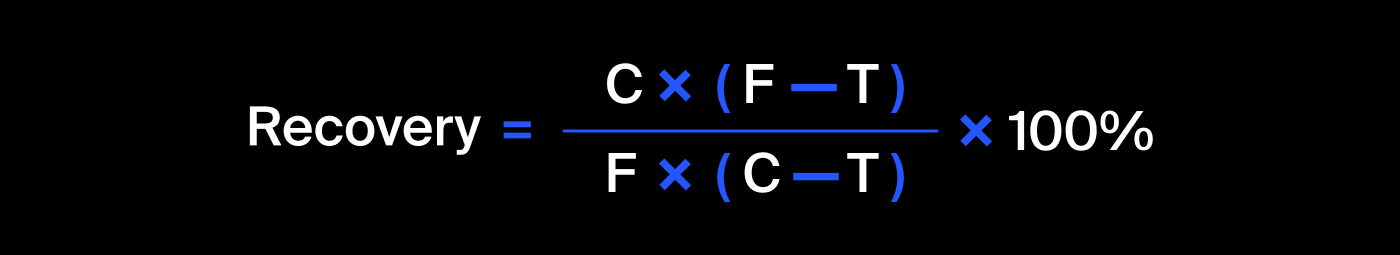

Оценивая абсолютную ошибку можно заметить, что они слишком велика, из чего следует вывод, что эффективность обогащения определена верно, поскольку ошибка составляет 9.73

Оценивая вывод принтов по колонкам можно заметить, что некоторых данных нет в тестовой выборке. Таким образом можно заметить, что согласно заданию, в данных нет некоторых столбцов, потому что они будут быть посчитаны через какое-то время после составления предыдущих столбцов. В данных нет столбцов, в который показывается результат, а именно ().output.(). Если второе слово -- output, то таких данных не будет в тестовой выборке, потому что они будут посчитаны впоследствии. 

In [16]:
df_test_corr = df_test.corr()
df_test_corr.style.background_gradient(cmap='coolwarm')

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
primary_cleaner.input.sulfate,1.000000,0.452138,0.114564,0.496786,0.100810,0.047802,0.074719,0.139819,0.024925,0.028155,0.093636,-0.019008,0.359236,0.428248,0.461740,-0.010257,0.423813,0.436207,0.616477,0.550640,0.585522,0.539113,0.234925,0.222601,-0.229253,-0.047140,-0.245993,-0.052403,-0.246659,-0.014574,-0.233454,-0.119842,-0.248709,-0.063864,0.051477,-0.037756,0.257649,-0.010734,0.144912,0.004598,0.147967,0.020321,0.305068,0.116753,0.347817,0.067733,0.093433,0.127277,0.156416,0.072229,-0.134194,0.034655
primary_cleaner.input.depressant,0.452138,1.000000,0.214707,0.144649,0.128135,0.215392,0.133109,0.200031,0.025947,0.185370,0.126572,0.073040,0.497323,0.466184,0.133046,0.005012,0.171353,0.460382,0.231353,0.339256,0.210909,0.345551,0.408884,0.130801,-0.356190,-0.114405,-0.367074,-0.105012,-0.348432,-0.075352,-0.362110,-0.127322,-0.377406,-0.112718,0.077763,-0.089231,0.231374,-0.102904,0.280420,0.119902,0.253658,0.109505,0.321422,0.108111,0.234910,-0.087961,-0.092530,-0.001364,0.062158,-0.003504,-0.200422,0.029256
primary_cleaner.input.feed_size,0.114564,0.214707,1.000000,-0.291292,-0.064628,0.082869,-0.063490,0.071470,-0.091542,0.066384,-0.074156,0.065808,0.338795,0.000398,0.019618,-0.087339,0.057400,0.238692,-0.186211,0.224360,-0.231701,0.200080,0.023678,-0.236632,0.044605,0.051614,0.064617,0.049608,-0.009526,0.073623,-0.012558,0.006890,-0.129796,0.036627,-0.128544,0.044605,-0.182687,0.005911,0.024735,0.032868,-0.017527,0.025709,-0.148328,-0.121148,-0.173658,-0.137180,-0.192880,-0.059167,-0.214970,-0.054173,0.026930,-0.083021
primary_cleaner.input.xanthate,0.496786,0.144649,-0.291292,1.000000,0.208295,-0.056301,0.153433,0.017111,0.045527,-0.075309,0.174404,-0.141550,0.049574,0.241885,0.464580,0.195480,0.372327,0.095280,0.581719,0.350601,0.594250,0.378950,0.402104,0.424813,-0.385724,-0.341158,-0.404612,-0.345842,-0.392190,-0.325264,-0.320581,-0.362139,-0.289656,-0.333668,-0.038199,-0.160438,0.221401,-0.111152,-0.041667,-0.033249,-0.050318,-0.008513,0.313515,0.131815,0.361214,0.122248,0.059953,0.128417,0.078242,0.096969,-0.217392,0.081986
primary_cleaner.state.floatbank8_a_air,0.100810,0.

Можно заметить, что некоторые значения, которые представлены в тестовой выборке имеют высокую корреляцию, что может привести к проблеме мультиколлинеарности. Для дальнейшего исследования столбцы не будут удалены, для чистоты исследования. 

## Анализ данных

[Text(0.5, 1.0, 'Концентрация серебра')]

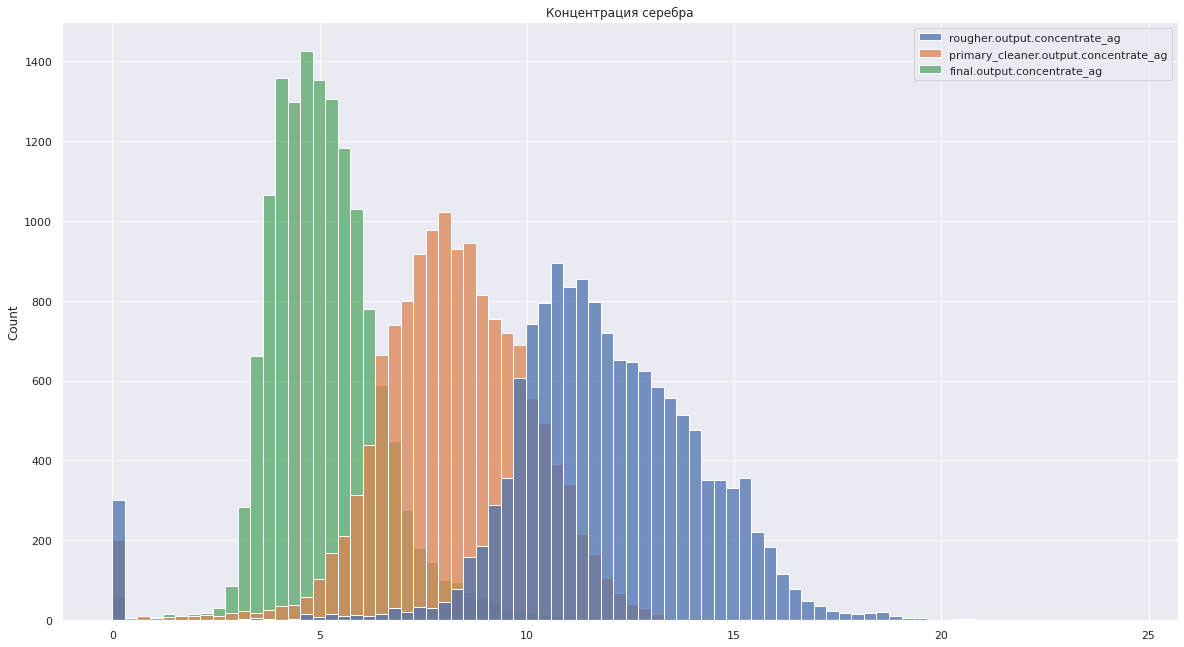

In [17]:
sns.set(rc={'figure.figsize':(20, 11)})
sns.histplot(data=df_train[['rougher.output.concentrate_ag',
                           'primary_cleaner.output.concentrate_ag',
                           'final.output.concentrate_ag']]).set(title='Концентрация серебра') 
#sns.regplot(x=df_train.index, y=df_train['rougher.output.concentrate_ag'], robust=True)


Можно заметить, что концентрация серебра постепенно падает, то есть иметт нисходящий тренд

[Text(0.5, 1.0, 'Концентрация золота')]

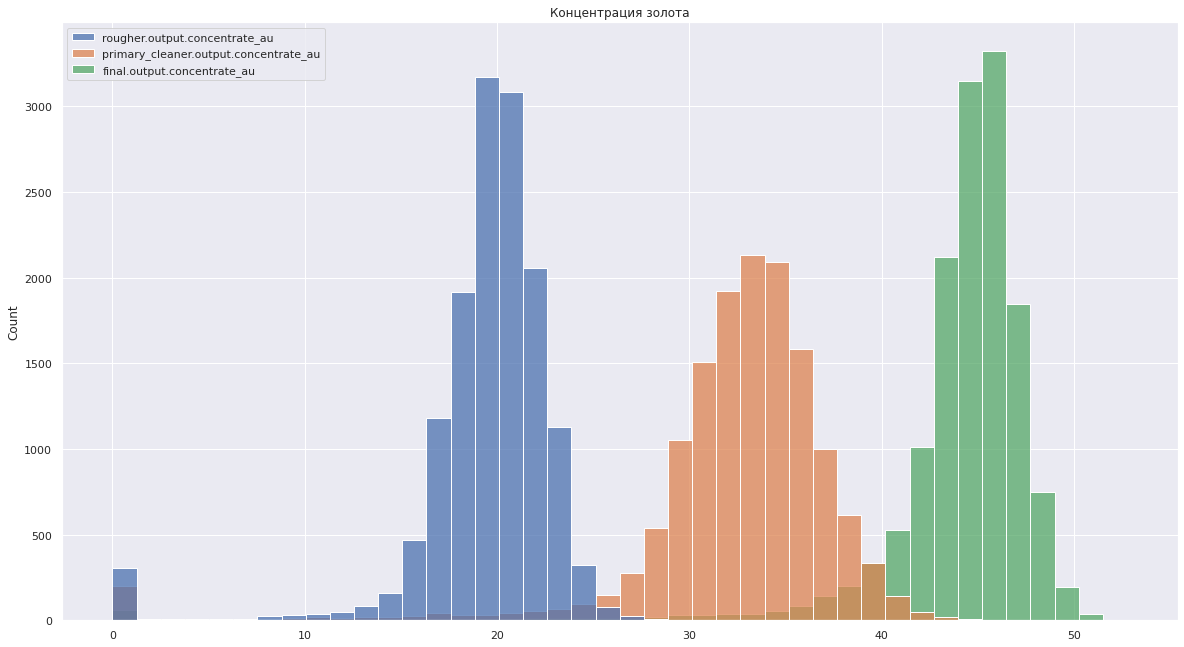

In [18]:
sns.set(rc={'figure.figsize':(20, 11)})
sns.histplot(data=df_train[['rougher.output.concentrate_au',
                           'primary_cleaner.output.concentrate_au',
                           'final.output.concentrate_au']]).set(title='Концентрация золота')

В отличие от серебра, концентрация золота на всех трех этапах принимает примерно одинаковые значения. 
   

[Text(0.5, 1.0, 'Концентрация свинца')]

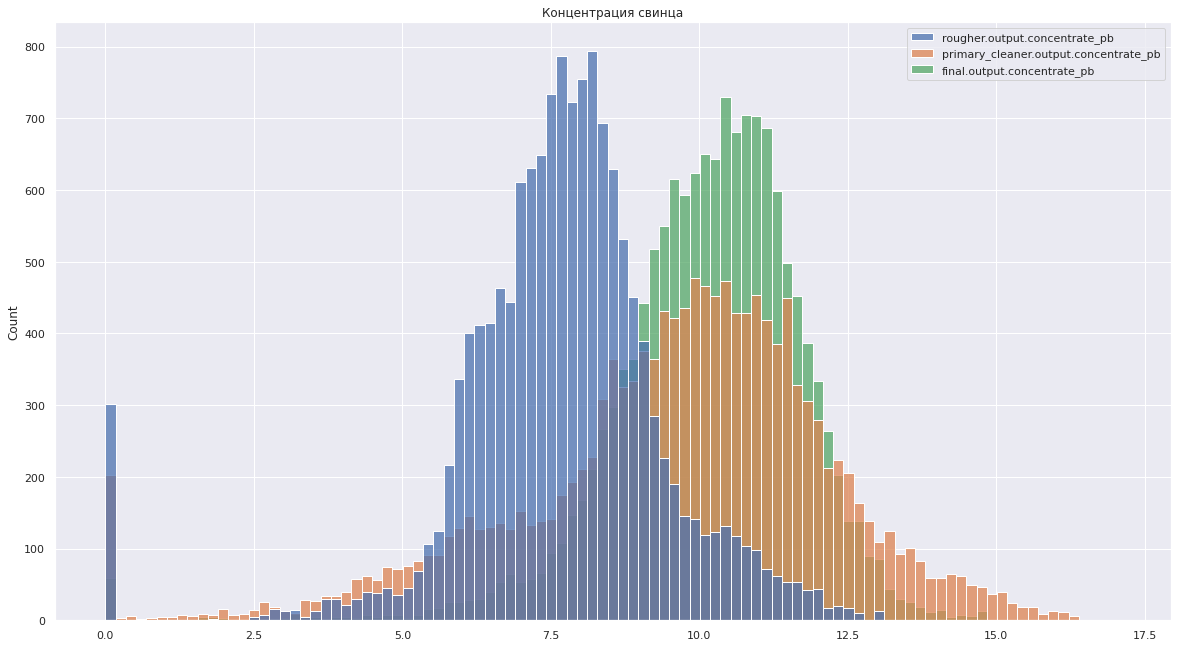

In [19]:
sns.set(rc={'figure.figsize':(20, 11)})
sns.histplot(data=df_train[['rougher.output.concentrate_pb',
                           'primary_cleaner.output.concentrate_pb',
                           'final.output.concentrate_pb']]).set(title='Концентрация свинца')

Свинец же по большей части присутствует в первом и последнем этапах, когда на 2-м этапе его концентрация падает

[(0.0, 200.0)]

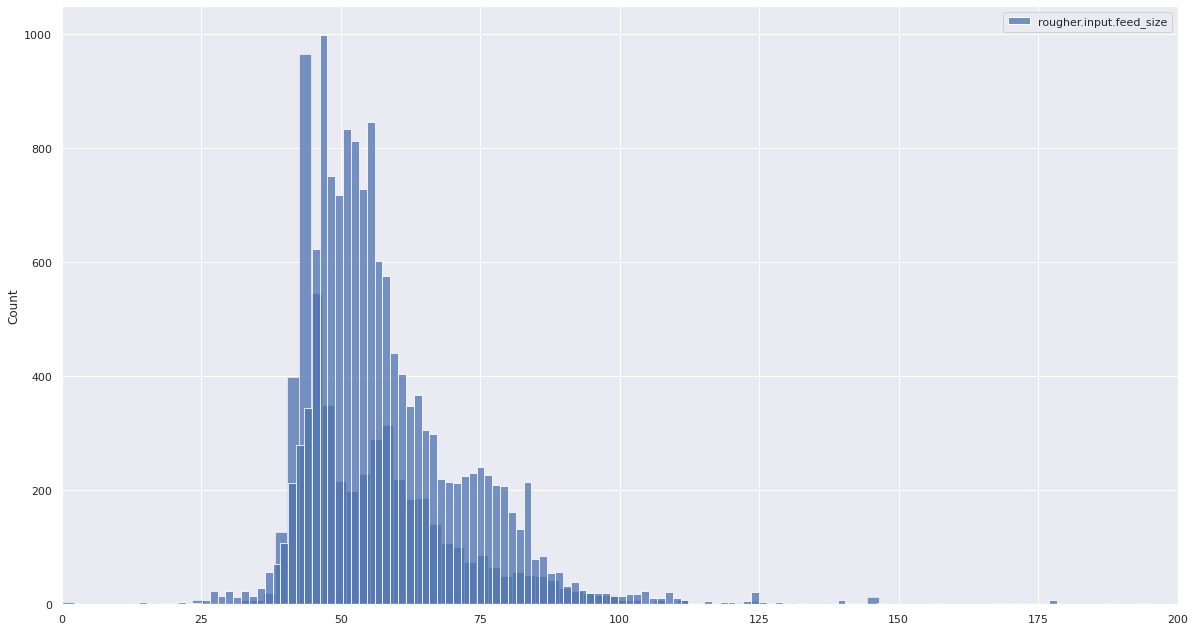

In [20]:
sns.set(rc={'figure.figsize':(20, 11)})

sns.set_palette('crest')

sns.set(rc={'figure.figsize':(20, 11)})
sns.histplot(data=df_test[['rougher.input.feed_size']]).set(xlim=(0, 200))
sns.histplot(data=df_train[['rougher.input.feed_size']]).set(xlim=(0, 200))

Таким образом можно сказать, что распределения примерно похожи, что говорит о том, что впоследствии оценка модели будет правильной. 

<AxesSubplot:xlabel='rougher.input.feed_ag', ylabel='Count'>

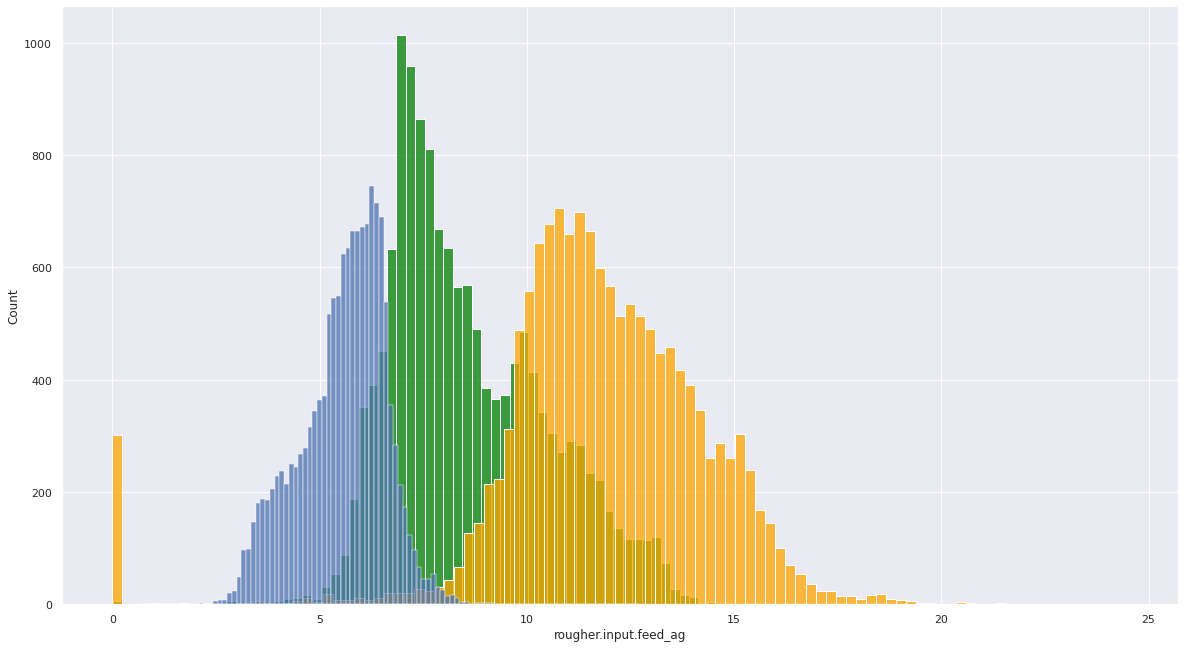

In [21]:
data_hist = df_train['rougher.input.feed_ag'] 
+ df_train['rougher.input.feed_pb'] 
+ df_train['rougher.input.feed_au'] 
+ df_train['rougher.input.feed_sol']

data_hist2 = df_train['rougher.output.concentrate_ag']
+ df_train['rougher.output.concentrate_pb'] 
+ df_train['rougher.output.concentrate_au']
+ df_train['rougher.output.concentrate_sol']

data_hist3 = df_train['rougher.output.tail_ag']
+ df_train['rougher.output.tail_pb']
+ df_train['rougher.output.tail_sol']
+ df_train['rougher.output.tail_au']

sns.set(rc={'figure.figsize':(20, 11)})
sns.histplot(data=data_hist, color='green')
sns.histplot(data=data_hist2, color='orange')
sns.histplot(data=data_hist3)

Таким образом можно сказать, что на входе суммарная концентрация веществ в сырье больше, чем на остальных этапах. Также стоит заметить выбросы в 0, их надо удалить: 

<AxesSubplot:xlabel='rougher.input.feed_ag', ylabel='Count'>

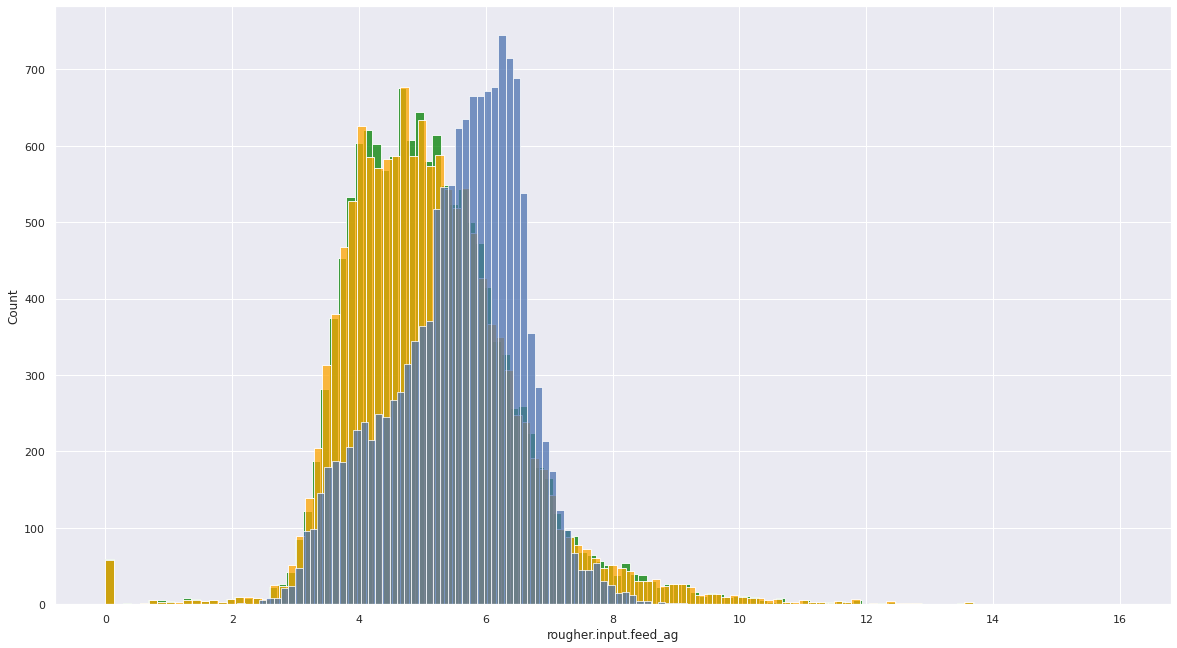

In [22]:
df_train['rougher.output.concentrate_ag'] = df_train.loc[df_train['rougher.output.concentrate_ag'] > 1]
df_train['rougher.output.concentrate_au'] = df_train.loc[df_train['rougher.output.concentrate_au'] > 1]
df_train['rougher.output.concentrate_pb'] = df_train.loc[df_train['rougher.output.concentrate_pb'] > 1]
df_train['rougher.output.concentrate_sol'] = df_train.loc[df_train['rougher.output.concentrate_sol'] > 1]

df_train['rougher.input.feed_ag'] = df_train.loc[df_train['rougher.input.feed_ag'] > 1]
df_train['rougher.input.feed_au'] = df_train.loc[df_train['rougher.input.feed_au'] > 1]
df_train['rougher.input.feed_pb'] = df_train.loc[df_train['rougher.input.feed_pb'] > 1]
df_train['rougher.input.feed_sol'] = df_train.loc[df_train['rougher.input.feed_sol'] > 1]

data_hist = df_train['rougher.input.feed_ag'] 
+ df_train['rougher.input.feed_pb'] 
+ df_train['rougher.input.feed_au'] 
+ df_train['rougher.input.feed_sol']

data_hist2 = df_train['rougher.output.concentrate_ag']
+ df_train['rougher.output.concentrate_pb'] 
+ df_train['rougher.output.concentrate_au']
+ df_train['rougher.output.concentrate_sol']

data_hist3 = df_train['rougher.output.tail_ag']
+ df_train['rougher.output.tail_pb']
+ df_train['rougher.output.tail_sol']
+ df_train['rougher.output.tail_au']

sns.set(rc={'figure.figsize':(20, 11)})
sns.histplot(data=data_hist, color='green')
sns.histplot(data=data_hist2, color='orange')
sns.histplot(data=data_hist3)

## Модель

In [23]:
target_features = ['rougher.output.recovery', 'final.output.recovery']
df_test = df_test.merge(df_full[target_features], on='date', how='left')

needed_cols = list(set(df_train.columns) - set(df_test.columns))
df_train = df_train.drop(needed_cols, axis=1)

features_train = df_train.drop(target_features, axis=1) 
target_train = df_train[target_features]
features_test = df_test.drop(target_features, axis=1) 
target_test = df_test[target_features]

features_train = features_train.ffill()
features_test = features_test.ffill()

Преобразуем данные, сформулируем features и target для дальнейшего исследования, а также проведем кодировку данных. 

In [24]:
def smape(target, predictions):
    num = np.abs(target - predictions)
    denom = (np.abs(target) + np.abs(predictions)) / 2 
    return 100 * np.sum(num/denom) / len(target)
    
def final_smape(target, predictions):
    target_rougher = target['rougher.output.recovery']
    target_final = target['final.output.recovery']
    predictions_rougher = predictions[:, 0]
    predictions_final = predictions[:, 1]
    return 0.25 * smape(target_rougher, predictions_rougher) + 0.75 * smape(target_rougher, predictions_rougher)

scorer=make_scorer(final_smape, greater_is_better=False) 

In [25]:
model = LinearRegression()
model.fit(features_train, target_train)
smape_crossval = cross_val_score(model, features_train, target_train, cv=5, scoring=scorer).mean()
#smape_crossval = final_smape
    
print('sMAPE равно:', -smape_crossval) 

sMAPE равно: 12.804451982828093


Использование кросс-валидации и применение функции sMAPE

In [26]:
model2 = RandomForestRegressor(random_state=12345, max_depth=7, max_features='auto', n_estimators=100)
model2.fit(features_train, target_train) 
cross_smape = cross_val_score(model2, features_train, target_train, cv=5, scoring=scorer).mean()
print('sMAPE равно:', -cross_smape)

sMAPE равно: 11.40206789258733


In [27]:
#params = {'max_depth': [3, 5, 7, 9]}

#model_search = RandomForestRegressor()

#grid_search = GridSearchCV(model_search, params)
#grid_search.fit(features_train, target_train) 

#print('Params', grid_search.best_params_)
#print('оценка', grid_search.best_score_)

#best_model = grid_search.best_estimator_
#predictions_cv = best_model.predict(features_train)

#Params {'max_depth': 7}
#оценка -0.013719621321894604


In [28]:
for d in range(3, 8): 
    rf_for = RandomForestRegressor(random_state=12345, max_depth=d) 
    rf_for.fit(features_train, target_train) 
    rf_smape = cross_val_score(rf_for, features_train, target_train, cv=5, scoring=scorer).mean()
    print('sMAPE равно:', -rf_smape)
    

sMAPE равно: 11.751600395766463
sMAPE равно: 11.358392111161487
sMAPE равно: 11.25736168733809
sMAPE равно: 11.397119682256776
sMAPE равно: 11.40206789258733


In [29]:
rf_d = RandomForestRegressor(random_state=12345, max_depth=6)
rf_d.fit(features_train, target_train)
smape_rf_d = cross_val_score(rf_d, features_train, target_train, cv=5, scoring=scorer).mean()
print('sMAPE:', -smape_rf_d)

sMAPE: 11.397119682256776


Таким образом можно сказать, что первая модель случайного леса показала себя лучше второй модели случайного леса, а также показала себя лучше двух моделей линейной регресии

In [30]:
model_dummy1 = DummyRegressor()
model_dummy1.fit(features_train, target_train) 
predictions_test1 = model_dummy1.predict(features_test) 
print('sMAPE на тестовых данных:', final_smape(target_test, predictions_test1))

sMAPE на тестовых данных: 10.379799283438494


In [31]:
#columns_needed = features_test.columns
#features_train = features_train.loc[:, columns_needed]

In [32]:
model_final = RandomForestRegressor(random_state=12345, max_depth=6, max_features='auto', n_estimators=200) 
model_final.fit(features_train, target_train) 
predictions_final_model = model_final.predict(features_test)

print('sMAPE для тестовой выборки:', final_smape(target_test, predictions_final_model))

sMAPE для тестовой выборки: 9.119153533286086


# Вывод

В рамках проекта я проанализировал три датасета, а именно датасет с тестовой выборкой, тренировочной выборкой, а также датасет со всем списков значений. Были заменены пропуски, а также проанализирована правильность расчета эффективности обогащения. 
Также были проанализированы содержания металлов на разных этапах производства, а также суммарная концентрация всех веществ на разных стадиях производства.
    
Было построено несколько моделей, посчитаны метрики sMAPE и проведена кросс-валидация для выявления лучшей модели, которая была использована на тестовой выборке. 